In [ ]:
import sys
import keras

print('Sys version: {} '.format(sys.version))
print('Keras version: {} '.format(keras.__version__))

In [23]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print('Training Images: {} '.format(X_train.shape))
print('Test Images: {} '.format(X_test.shape))

Training Images: (50000, 32, 32, 3) 
Test Images: (10000, 32, 32, 3) 


In [4]:
# Single image shape
print(X_train[0].shape)

(32, 32, 3)


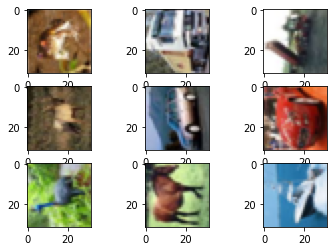

In [5]:
# Create a grid of 3x3 image

for i in range (0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i].transpose([1,0,2])
    plt.imshow(img)
    
# Showing the plot
plt.show()

In [6]:
# Preprocessing the dataset
# Fix the random seed for reproducibilty

seed = 6
np.random.seed(seed)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the inputs from int to float 0-255 to 0.0 - 1.0

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /=255.0
X_test /=255.0


In [7]:
# Class label shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [8]:
# one-hot vector [6] = [0,0,0,0,0,0,1,0,0,0]
# hot-encode outputs

Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

num_class = Y_test.shape[1]
print(num_class)
print(Y_train.shape)
print(Y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Building the ALL-CNN

In [9]:
# Start by importing necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, RMSprop

In [10]:
# Define the model function

def allcnn(weights = None):
    
    # define model type - sequential
    model = Sequential() 
    
    # add model layers
    model.add(Conv2D(96,(3,3), padding = 'same', input_shape = (32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3), padding = 'same', strides = (2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3,3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1,1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1,1), padding = 'valid'))
    
    # add global average pooling layer with softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weight options
    if weights:
        model.load_weights(weights)
        
    # return the model
    return model

In [30]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# defining pre-trained weights and build model
weights = 'all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

# print model summary
print (model.summary())

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 192)      

In [45]:
# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# Zipping the names and labels to make a dictionary and batch size of 9 images in output
class_labels = dict(zip(classes, names))
batch = X_test[200:209]
labels = np.argmax(Y_test[200:209],axis=-1)
predictions = model.predict(batch, verbose = 1)
# print our predictions
print (predictions)

1/1 [==============================] - 0s 91ms/step
[[1.2115192e-15 1.0674090e-16 1.4219451e-11 3.5704571e-07 8.1885693e-11
  9.9999964e-01 4.7734489e-13 1.1980049e-12 2.2692936e-16 2.0621987e-13]
 [6.4261877e-07 9.9975687e-01 8.0789550e-12 2.0603125e-11 1.1383872e-12
  2.3849835e-13 9.1040673e-13 1.5755708e-11 1.6989024e-08 2.4248411e-04]
 [3.6206685e-16 1.6933334e-15 1.6178888e-28 7.1377290e-27 2.7348353e-26
  1.1478514e-26 1.1445890e-27 7.1766217e-23 1.0000000e+00 5.2123203e-20]
 [7.1700848e-13 1.5940967e-16 3.2178308e-16 6.9620823e-11 9.3143679e-09
  8.7793450e-07 1.1552991e-14 9.9999917e-01 4.7298727e-20 2.0301262e-16]
 [2.6387924e-23 1.0000000e+00 3.5326445e-30 1.9886701e-29 3.4975017e-29
  4.3210796e-29 1.4608908e-17 1.0963105e-28 2.9874058e-24 3.7628216e-14]
 [1.3709016e-21 3.6240690e-23 1.6433924e-20 1.0000000e+00 1.2384150e-16
  2.6028813e-08 6.2097240e-19 1.8073362e-15 4.3471971e-24 2.0665094e-22]
 [9.8978126e-01 6.4251213e-12 5.4472315e-07 1.5529296e-06 4.6457156e-08
  5.92

In [46]:
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [47]:
class_result = np.argmax(predictions, axis=-1)
print (class_result)

[5 1 8 7 1 3 0 5 7]


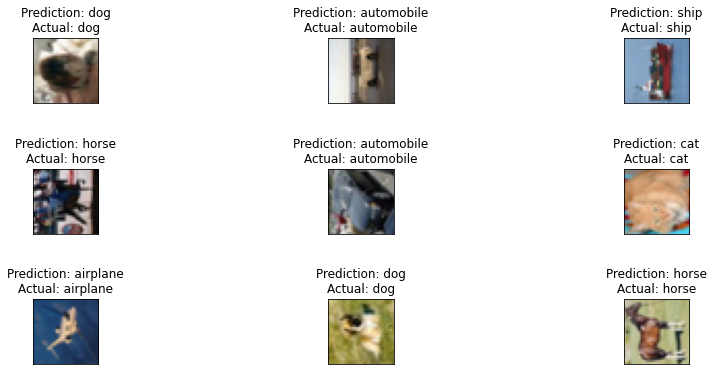

In [48]:
# Creating a 3x3 image

fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img.transpose([1,0,2]))
    
# show the plot
plt.show()
